### קריאת הקובץ סידור יצירת עמודות רלוונטיות

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def merge_csv_files(file_paths):
    
    dataframes = []

    
    for file_path in file_paths:
        df = pd.read_csv(file_path)
        dataframes.append(df)


    merged_df = pd.concat(dataframes, ignore_index=True)
    
    return merged_df


file_paths = [
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_1.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_2.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_3.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_4.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_5.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_6.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_7.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_8.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_9.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_10.csv'
]

df = merge_csv_files(file_paths)


In [2]:
## סידור של עמודת המוצא האתני כדי להבין לאיזה מוצא כל אות מייתחסת
descent_mapping = {
    'A': 'Asian',
    'B': 'Black',
    'C': 'Chinese',
    'D': 'Cambodian',
    'F': 'Filipino',
    'G': 'Guamanian',
    'H': 'Hispanic',
    'I': 'American Indian/Alaskan Native',
    'J': 'Japanese',
    'K': 'Korean',
    'L': 'Laotian',
    'O': 'Other',
    'P': 'Pacific Islander',
    'S': 'Samoan',
    'U': 'Hawaiian',
    'V': 'Vietnamese',
    'W': 'White',
    'X': 'Unknown',
    'Z': 'Asian Indian'
}
df['victim_descent'] = df['victim_descent'].map(descent_mapping)

## יצרית עמודה להבנה האם הפשע קרה בשעות הבוקר,צהריים,אחר הצהרים,ערב,לילה 
def categorize_time(datetime):
    hour = datetime.hour
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Noon'
    elif 16 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'
df['day_time'] = pd.to_datetime(df['date_occurred']).apply(categorize_time)



In [3]:
## יצרית עמודה האם הקורבן הוא ילד,נער מתבגר,מבוגר,זקן
def age_category(age):
    if age < 10:
        return "child"
    elif age < 18:
        return "teenager"
    elif age < 60:
        return "adult"
    else:
        return "old"


df["age_description"] = df["victim_age"].apply(age_category)


In [4]:
df['date_occurred'] = pd.to_datetime(df['date_occurred'])

def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'


df['period_occurred'] = df['date_occurred'].dt.month.apply(get_season)


In [5]:
## הוספת עמודה של פער בין דאריך הדיווח לתאריך ההתרחשות בימים
df['date_reported'] = pd.to_datetime(df['date_reported']).dt.date
df['date_occurred'] = pd.to_datetime(df['date_occurred']).dt.date
df['day_dift'] = (pd.to_datetime(df['date_reported']) - pd.to_datetime(df['date_occurred'])).dt.days




### תרגום של העמודות

In [56]:
import pandas as pd


file_pt= r'C:\Users\Win10\Desktop\Columns_transltion.xlsx'


translating = pd.read_excel(file_pt)


last_three_columns = translating .iloc[:, -3:]


my_translation = last_three_columns.iloc[6:]

my_translation 

,Unnamed: 7,Unnamed: 8,Unnamed: 9
6,משתנה,תיאור,סוג
7,division_number,מספר המחלקה של אירוע הפשע.,int
8,date_reported,התאריך שבו דווח הפשע.,datetime64[ns]
9,date_occurred,התאריך שבו התרחש הפשע.,datetime64[ns]
10,area,קוד האזור שבו התרחש אירוע הפשע.,int
11,area_name,שם האזור שבו התרחש אירוע הפשע.,object
12,reporting_district,אזור הדיווח של אירוע הפשע.,int
13,part,מספר החלק של אירוע הפשע.,int
14,crime_code,קוד המתאים לסוג הפשע.,int
15,crime_description,תיאור הפשע.,object


### קוד הפשע של כל פשע

In [ ]:
crime_df = df[['crime_description', 'crime_code']]
crime_df = crime_df.drop_duplicates(subset=['crime_code'], keep='first')
crime_df

### פיצול הקובץ לקטגוריות

In [6]:
violence_df = df[df['crime_description'].isin(['BATTERY - SIMPLE ASSAULT',
                                         'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
                                         'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
                                         'CRIMINAL THREATS - NO WEAPON DISPLAYED',
                                         'ARSON',
                                         'INTIMATE PARTNER - SIMPLE ASSAULT',
                                         'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
                                         'BRANDISH WEAPON',
                                         'OTHER ASSAULT',
                                         'SHOTS FIRED AT INHABITED DWELLING',
                                         'KIDNAPPING - GRAND ATTEMPT',
                                         'DISCHARGE FIREARMS/SHOTS FIRED',
                                         'KIDNAPPING',
                                         'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT',
                                         'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT',
                                         'CRIMINAL HOMICIDE',
                                         'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER',
                                         'BATTERY ON A FIREFIGHTER',
                                         'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT',
                                         'CRUELTY TO ANIMALS',
                                         'LYNCHING - ATTEMPTED',
                                         'MANSLAUGHTER, NEGLIGENT',
                                         'LYNCHING'])]
crime_list1 = [
    'SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
    'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
    'THEFT PLAIN - PETTY ($950 & UNDER)',
    'ROBBERY',
    'BURGLARY',
    'VEHICLE - STOLEN',
    'BUNCO, GRAND THEFT',
    'THEFT OF IDENTITY',
    'BIKE - STOLEN',
    'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)',
    'THEFT FROM MOTOR VEHICLE - ATTEMPT',
    'EXTORTION',
    'CHILD STEALING',
    'ATTEMPTED ROBBERY',
    'PURSE SNATCHING',
    'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)',
    'BUNCO, PETTY THEFT',
    'BUNCO, ATTEMPT',
    'THEFT PLAIN - ATTEMPT',
    'SHOPLIFTING - ATTEMPT',
    'THEFT FROM PERSON - ATTEMPT',
    'VEHICLE - ATTEMPT STOLEN',
    'BURGLARY FROM VEHICLE, ATTEMPTED',
    'PICKPOCKET',
    'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)',
    'COUNTERFEIT',
    'CREDIT CARDS, FRAUD USE ($950 & UNDER)',
    'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01',
    'DISHONEST EMPLOYEE - GRAND THEFT',
    'TILL TAP - PETTY ($950 & UNDER)',
    'CREDIT CARDS, FRAUD USE ($950.01 & OVER)',
    'PETTY THEFT - AUTO REPAIR',
    'BOAT - STOLEN',
    'PURSE SNATCHING - ATTEMPT',
    'BIKE - ATTEMPTED STOLEN',
    'BRIBERY',
    'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)',
    'GRAND THEFT / INSURANCE FRAUD',
    'DISHONEST EMPLOYEE - PETTY THEFT',
    'THEFT, COIN MACHINE - PETTY ($950 & UNDER)',
    'GRAND THEFT / AUTO REPAIR',
    'DISHONEST EMPLOYEE ATTEMPTED THEFT'
]

Thefts_and_frauds = df[df['crime_description'].isin(crime_list1)]

crime_list2 = [
    'RAPE, FORCIBLE',
    'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE',
    'BATTERY WITH SEXUAL CONTACT',
    'LETTERS, LEWD - TELEPHONE CALLS, LEWD',
    'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ',
    'SEXUAL PENETRATION W/FOREIGN OBJECT',
    'INDECENT EXPOSURE',
    'ORAL COPULATION',
    'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH',
    'PIMPING',
    'RAPE, ATTEMPTED',
    'CHILD PORNOGRAPHY',
    'PEEPING TOM',
    'PANDERING',
    'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM',
    'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)'
]


sex_crimes = df[df['crime_description'].isin(crime_list2)]



### בדיקת תקינות הנתונים

In [ ]:
missing_values_by_column = df.isnull().sum()


result_df = pd.DataFrame({
    'column name': missing_values_by_column.index,
    'Amount of missing values': missing_values_by_column.values
})
missing_values_by_column 

In [ ]:
## משהו שמאוד קורץ לעין זהשיש המון חסרים מעמודות של מין הקורבן ומוצאו אבל לא חסר כלום בעמודת הגיל

sns.boxplot(x='victim_age', data=df)
plt.title('Boxplot of Victim Age')
plt.xlabel('Victim Age')
plt.ylabel('Distribution')
plt.show() 

In [9]:
filtered_df = df[(df['victim_age'] == 0) & (df['victim_sex'].isna()) & (df['victim_descent'].isna())]


crime_counts = filtered_df['crime_description'].value_counts()

new_data = pd.DataFrame({'crime_description': crime_counts.index, 'frequency': crime_counts.values})
new_data.head(20)

,crime_description,frequency
0,VEHICLE - STOLEN,90980
1,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),17873
2,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",1763
3,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, B...",1020
4,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",330
5,BOAT - STOLEN,120
6,BURGLARY,74
7,BURGLARY FROM VEHICLE,48
8,THEFT PLAIN - PETTY ($950 & UNDER),41
9,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",40


In [10]:
filtered_data = df[(df['crime_description'] == 'VEHICLE - STOLEN') & (df['victim_age'] == 0)]
crime_description_counts = filtered_df['crime_description'].value_counts()

crime_description_counts


crime_description
VEHICLE - STOLEN                                            90980
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             17873
EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)                   1763
VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)     1020
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD      330
BOAT - STOLEN                                                 120
BURGLARY                                                       74
BURGLARY FROM VEHICLE                                          48
THEFT PLAIN - PETTY ($950 & UNDER)                             41
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)        40
THEFT OF IDENTITY                                              37
ROBBERY                                                        33
SHOPLIFTING - PETTY THEFT ($950 & UNDER)                       28
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)            23
TRESPASSING                                               

In [11]:
filtered_data = df.loc[(df['crime_description'] == 'VEHICLE - STOLEN') & (df['victim_age'] == 0), ['crime_description', 'victim_age']]
filtered_data

,crime_description,victim_age
33,VEHICLE - STOLEN,0
78,VEHICLE - STOLEN,0
104,VEHICLE - STOLEN,0
105,VEHICLE - STOLEN,0
135,VEHICLE - STOLEN,0
...,...,...
852889,VEHICLE - STOLEN,0
852900,VEHICLE - STOLEN,0
852916,VEHICLE - STOLEN,0
852926,VEHICLE - STOLEN,0


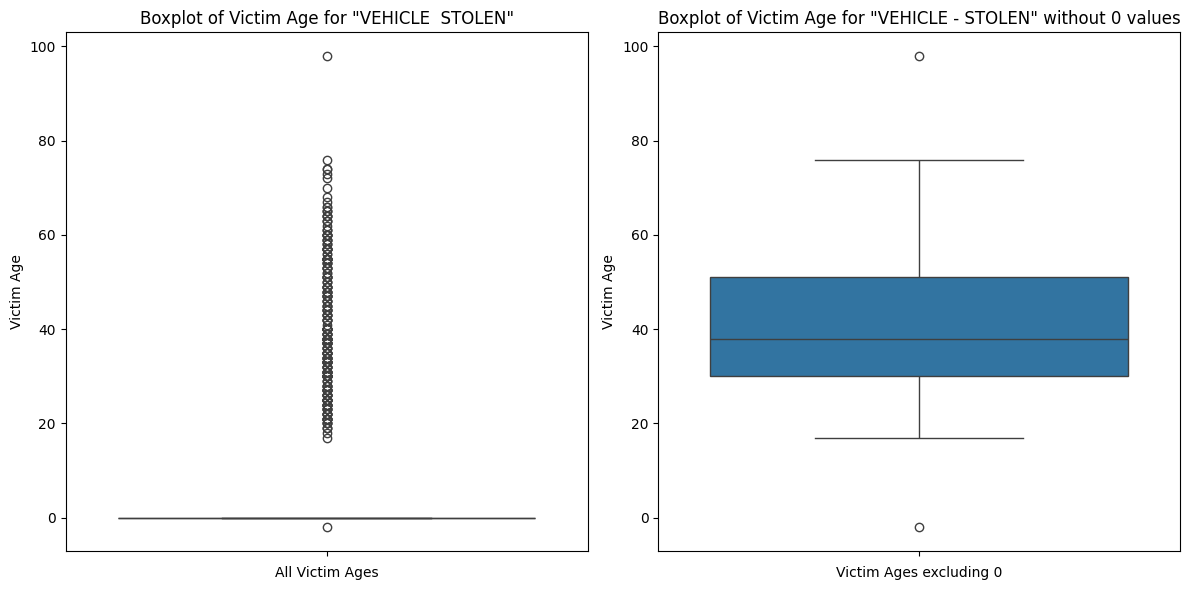

In [29]:
filtered_data_all = df[df['crime_description'] == 'VEHICLE - STOLEN']
filtered_data_no_0 = df[(df['crime_description'] == 'VEHICLE - STOLEN') & (df['victim_age'] != 0)]

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.boxplot(y='victim_age', data=filtered_data_all)
plt.title('Boxplot of Victim Age for "VEHICLE  STOLEN"')
plt.ylabel('Victim Age')
plt.xlabel('All Victim Ages')


plt.subplot(1, 2, 2)
sns.boxplot(y='victim_age', data=filtered_data_no_0)
plt.title('Boxplot of Victim Age for "VEHICLE - STOLEN" without 0 values')
plt.ylabel('Victim Age')
plt.xlabel('Victim Ages excluding 0')

plt.tight_layout()
plt.show()

In [30]:
#### אף על פי זה שאנו מבינים רוב המקרים שבהם הוזן הערך 0 אינם באמת תיקנות אלה ערכים חסרים לא נמהר
### להסיר אותם מהדאטה מכיוון שיש מצב שזה פשוט קורבנותש מעדיפים להישאר בעילום שם

###  ריצחות והריגות

In [ ]:
violence_df
cod_crime = violence_df[['crime_description', 'crime_code']]
cod_crime = cod_crime.drop_duplicates(subset=['crime_code'], keep='first')

In [13]:
kiling_data = violence_df.loc[violence_df['crime_code'].isin([110, 111])]
kiling_data # דאטה על הרציחות 

victim_age_count = kiling_data['victim_age'].value_counts().reset_index()
victim_age_count.columns = ['Victim age','Number of murdered'] # דאטה רציחות לפי גיל

victim_sex_count = kiling_data['victim_sex'].value_counts().reset_index()
victim_sex_count.columns = ['Victim sex','Number of murdered'] #דאטה רציחות לפי מין 


area_count = kiling_data['area_name'].value_counts().reset_index()
area_count.columns = ['Area name','Number of murdered'] # דאטה רציחות לפי אזור

ethnicity_count = kiling_data['victim_descent'].value_counts().reset_index()
ethnicity_count.columns = ['Murder by ethnicity','Number of murdered'] # דאטה רציחות לפי מוצא אתני 

day_time_count = kiling_data['day_time'].value_counts().reset_index()
day_time_count.columns = ['Murders by time of day','Number of murdered'] # דאטה רציחות לפי זמן


C:\Users\Win10\AppData\Local\Temp\ipykernel_12064\2713543793.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=area_count, x='Area name', y='Number of murdered', palette='viridis')


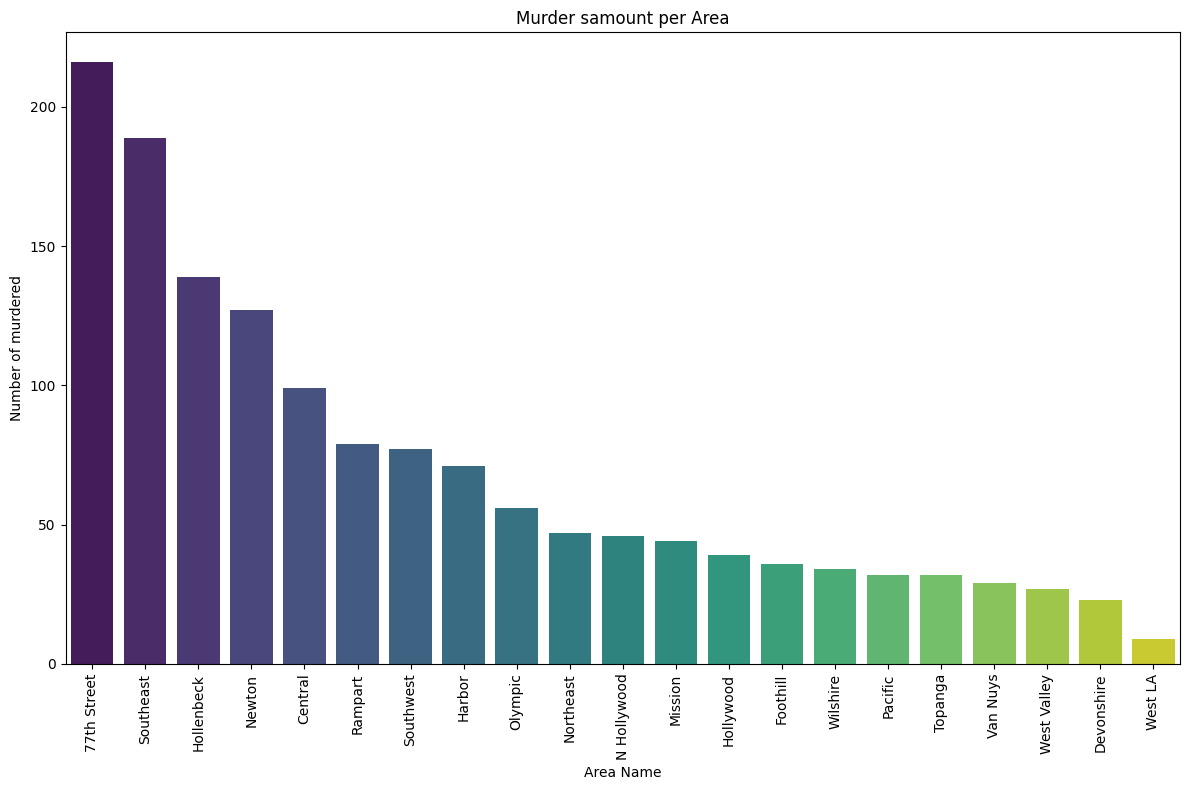

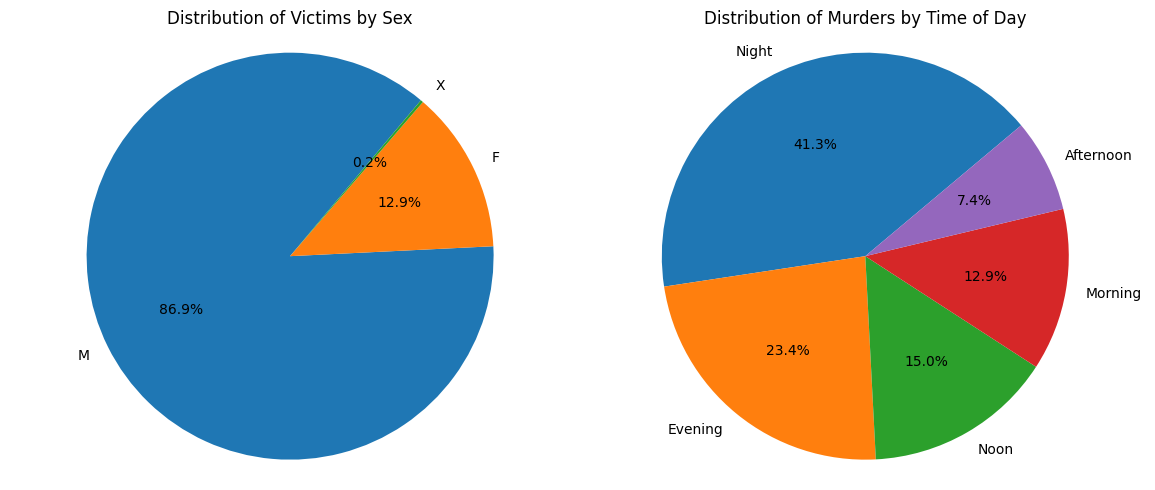

C:\Users\Win10\AppData\Local\Temp\ipykernel_12064\2713543793.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x='Murder by ethnicity', y='Percentage', data=ethnicity_count, palette=colors)


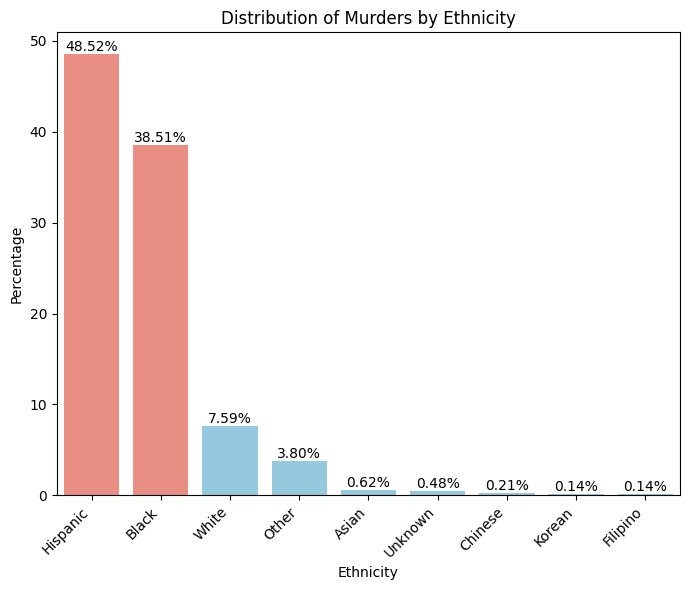

In [14]:
plt.figure(figsize=(12, 8))
sns.barplot(data=area_count, x='Area name', y='Number of murdered', palette='viridis')
plt.xlabel('Area Name')
plt.ylabel('Number of murdered')
plt.title('Murder samount per Area')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()




victim_sex_count = kiling_data['victim_sex'].value_counts()
day_time_count = kiling_data['day_time'].value_counts()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.pie(victim_sex_count, labels=victim_sex_count.index, autopct='%1.1f%%', startangle=50)
plt.title('Distribution of Victims by Sex')
plt.axis('equal')  

plt.subplot(1, 2, 2)
plt.pie(day_time_count, labels=day_time_count.index, autopct='%1.1f%%', startangle=40)
plt.title('Distribution of Murders by Time of Day')
plt.axis('equal')

plt.tight_layout()
plt.show()




total_murders = ethnicity_count['Number of murdered'].sum()


ethnicity_count['Percentage'] = (ethnicity_count['Number of murdered'] / total_murders) * 100


plt.figure(figsize=(7, 6))
colors = ['skyblue' if x <= ethnicity_count['Percentage'].mean() else 'salmon' for x in ethnicity_count['Percentage']]
plot = sns.barplot(x='Murder by ethnicity', y='Percentage', data=ethnicity_count, palette=colors)
plt.title('Distribution of Murders by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Percentage')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()


for p in plot.patches:
    plot.annotate('{:.2f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                  textcoords='offset points')

plt.show()



In [15]:
### מקומות בהם קראו מקרי רצח
pr = kiling_data['premise_description'].value_counts().reset_index()
pr.columns = ['premise description','Number of murdered']
pr.head(20)


,premise description,Number of murdered
0,STREET,533
1,SIDEWALK,259
2,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",148
3,PARKING LOT,107
4,SINGLE FAMILY DWELLING,107
5,ALLEY,54
6,PARK/PLAYGROUND,29
7,DRIVEWAY,26
8,"VEHICLE, PASSENGER/TRUCK",17
9,OTHER BUSINESS,11


In [35]:
### שימושיים בנשק בריצחות והריגות

In [21]:
use_of_weapons_data = kiling_data[kiling_data['weapon_description'].notna()]
frequency_of_use = use_of_weapons_data['weapon_description'].value_counts().reset_index()
frequency_of_use.columns = ['weapon_description','amount_of_uses']
frequency_of_use 

def sum_column_by_names(df, column_names):
    return frequency_of_use[frequency_of_use['weapon_description'].isin(column_names)]['amount_of_uses'].sum()

guns_sum = sum_column_by_names(frequency_of_use, ['HAND GUN', 'UNKNOWN FIREARM', 'SEMI-AUTOMATIC PISTOL', 'OTHER FIREARM', 'REVOLVER', 'RIFLE', 'SHOTGUN', 'STARTER PISTOL/REVOLVER', 'SEMI-AUTOMATIC RIFLE', 'HECKLER & KOCH 93 SEMIAUTOMATIC ASSAULT RIFLE', 'ASSAULT WEAPON/UZI/AK47/ETC'])

cold_weapon_sum = sum_column_by_names(frequency_of_use, ['UNKNOWN WEAPON/OTHER WEAPON', 'OTHER KNIFE', 'UNKNOWN TYPE CUTTING INSTRUMENT', 'KNIFE WITH BLADE 6INCHES OR LESS', 'KITCHEN KNIFE', 'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH', 'FOLDING KNIFE', 'OTHER CUTTING INSTRUMENT', 'BLUNT INSTRUMENT', 'HAMMER', 'CLUB/BAT', 'SWITCH BLADE', 'SCISSORS', 'BOTTLE', 'SCREWDRIVER', 'MACHETE', 'AXE', 'DIRK/DAGGER'])

improvised_weapon_sum = sum_column_by_names(frequency_of_use, ['STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)', 'PIPE/METAL PIPE', 'AIR PISTOL/REVOLVER/RIFLE/BB GUN', 'BOTTLE', 'BOARD', 'ANTIQUE FIREARM'])

ignition_or_run_over_sum = sum_column_by_names(frequency_of_use, ['VEHICLE', 'FIRE'])

something_else_sum = sum_column_by_names(frequency_of_use, ['VERBAL THREAT', 'SCALDING LIQUID', 'EXPLOXIVE DEVICE', 'LIQUOR/DRUGS'])

new_df = pd.DataFrame({'guns': [guns_sum],
                       'cold weapon': [cold_weapon_sum],
                       'An improvised weapon': [improvised_weapon_sum],
                       'ignition or run over': [ignition_or_run_over_sum],
                       'Something else': [something_else_sum]})

new_df

,guns,cold weapon,An improvised weapon,ignition or run over,Something else
0,1075,253,99,18,4


### עברות ביום לפי זמנים ביום

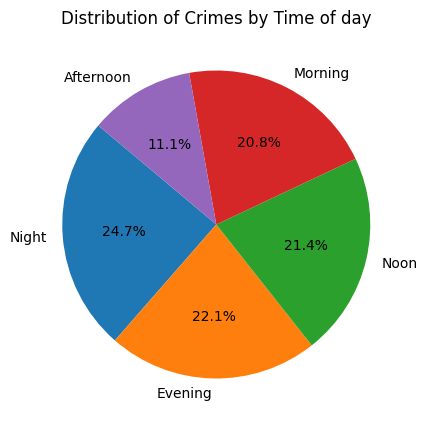

In [30]:
day_time_count = df['day_time'].value_counts().reset_index()
day_time_count.columns = ['crimes by time of day','Number of crimes']
day_time_count
plt.figure(figsize=(5,5))
plt.pie(day_time_count['Number of crimes'], labels=day_time_count['crimes by time of day'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Crimes by Time of day')
plt.show()

#####   לא ניתן להסיק משהו משמעתותי על שעות הפעילות של הפושעים בשעות היום הכל מסודר באופן די שווה
להוציא את שעות אחר הצהריים כי בסהכ אחר הצהריים זהבין השעות 16:00 ל 18:00 ולגיטימי שיהיה להם פחות אחוזים

### קורבנות לפי מוצע אתני

In [41]:
ethnicity_count = df['victim_descent'].value_counts().reset_index()
ethnicity_count.columns = ['Crime by ethnicity','Number of crime']
ethnicity_count

,Crime by ethnicity,Number of crime
0,Hispanic,261145
1,White,173440
2,Black,120896
3,Unknown,83214
4,Other,67532
5,Asian,18700
6,Korean,4579
7,Filipino,3580
8,Chinese,3313
9,Japanese,1181


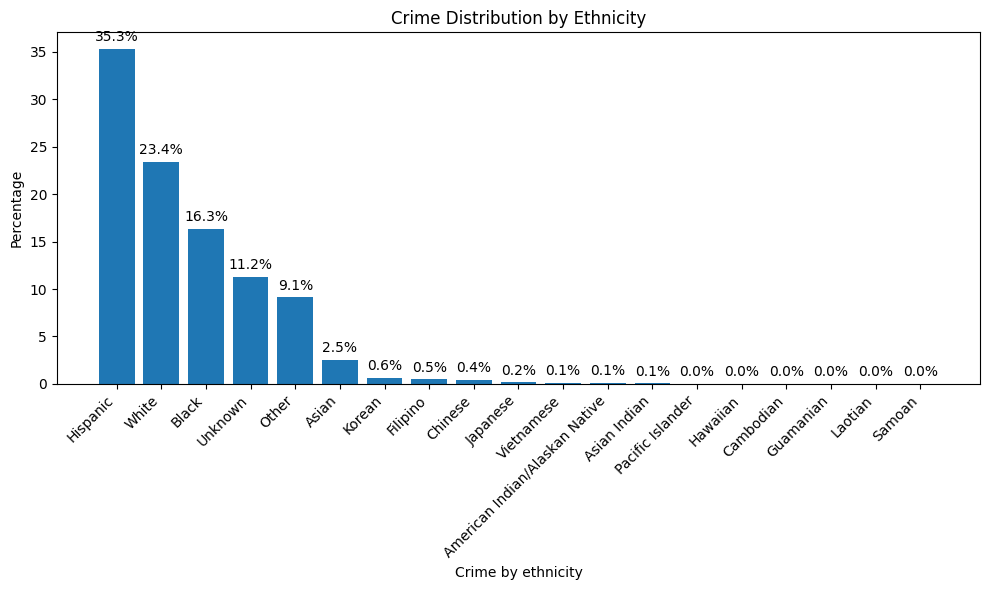

In [42]:

ethnicity_count = df['victim_descent'].value_counts(normalize=True).reset_index()
ethnicity_count.columns = ['Crime by ethnicity', 'Percentage']


ethnicity_count = ethnicity_count[ethnicity_count['Percentage'] != 0]


plt.figure(figsize=(10, 6))
plt.bar(ethnicity_count['Crime by ethnicity'], ethnicity_count['Percentage'] * 100)
plt.title('Crime Distribution by Ethnicity')
plt.xlabel('Crime by ethnicity')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')


for i, percentage in enumerate(ethnicity_count['Percentage']):
    plt.text(i, percentage * 100 + 0.5, f'{percentage*100:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [22]:
crime_description_count_df = crime_description_count.to_frame().reset_index()
crime_description_count_df.columns = ['crime_description', 'count']
crime_description_count_df.head(20)

NameError: name 'crime_description_count' is not defined

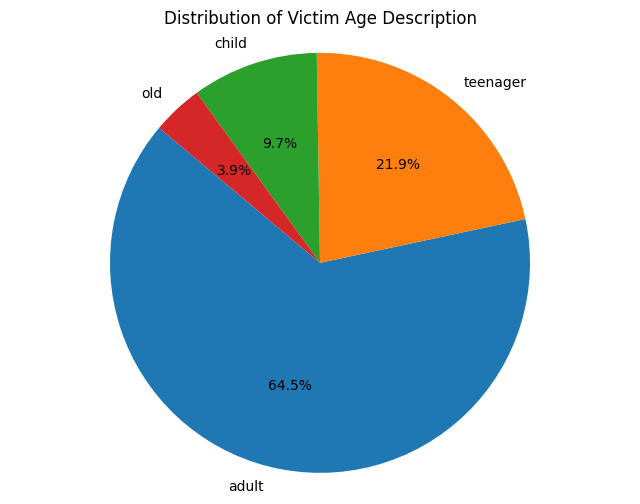

In [45]:
age_counts = sex_crimes["age_description"].value_counts()



plt.figure(figsize=(8, 6))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Victim Age Description')
plt.axis('equal') 
plt.show()

###  פשעים נגד ילדים ונערים

In [43]:
relevant_crimes = [
    'BATTERY - SIMPLE ASSAULT', 'RAPE, FORCIBLE', 'CRIMINAL THREATS - NO WEAPON DISPLAYED',
    'INTIMATE PARTNER - SIMPLE ASSAULT', 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
    'INTIMATE PARTNER - AGGRAVATED ASSAULT', 'BATTERY WITH SEXUAL CONTACT',
    'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)', 'OTHER ASSAULT',
    'SEXUAL PENETRATION W/FOREIGN OBJECT', 'DISCHARGE FIREARMS/SHOTS FIRED', 'LEWD/LASCIVIOUS ACTS WITH CHILD',
    'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH', 'CHILD ANNOYING (17YRS & UNDER)',
    'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT', 'RAPE, ATTEMPTED', 'CRIMINAL HOMICIDE'
]

# סינון הדאטה לפי התנאים הרלוונטיים
filtered_df = df[
    (df['victim_age'] >= 1) & (df['victim_age'] <= 18) &
    (df['crime_description'].isin(relevant_crimes))
]

chaildren_df = filtered_df


## לצורך הבדיקה הורדנו ערכים קטנים מ1 כי אנו סבורים שגילאים בהם הוזמן הערך 0 הם כנראה ערכים חסרים וערכים שקטנים מ0 זה כנראה טעות והם לא בהכרח מעידים על ילדים





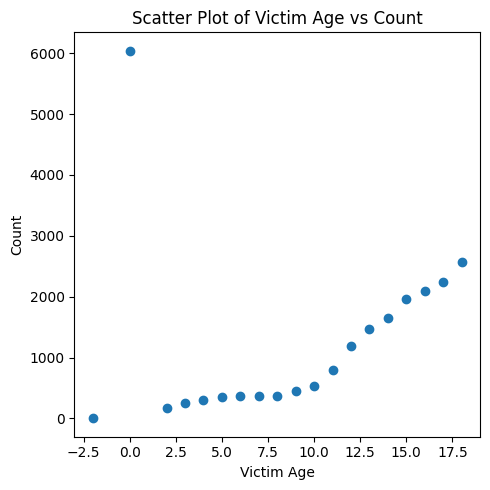

In [55]:
age_counts = chaildren_df['victim_age'].value_counts().reset_index()
age_counts.columns = ['victim_age', 'count']

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(age_counts['victim_age'], age_counts['count'])
ax.set_title('Scatter Plot of Victim Age vs Count')
ax.set_xlabel('Victim Age')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


###### ניקח רק ערכים שגדולים מ 0 כנראה במקום ערכים חסרים הזינו 0 וגבי -2.5 כנראה טעות הקלדה על מנת להסיק בצורה טובה יותר לא ניקח אותם בחשבון

In [33]:
residential_areas = [
    'SINGLE FAMILY DWELLING', 'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)',
    'GROUP HOME', 'OTHER RESIDENCE', 'YARD (RESIDENTIAL/BUSINESS)',
    'CONDOMINIUM/TOWNHOUSE', 'MOBILE HOME/TRAILERS/CONSTRUCTION TRAILERS/RV\'S/MOTORHOME',
    'FOSTER HOME BOYS OR GIRLS*', 'PROJECT/TENEMENT/PUBLIC HOUSING', 'PORCH, RESIDENTIAL',
    'TRANSIENT ENCAMPMENT', 'SINGLE RESIDENCE OCCUPANCY (SRO\'S) LOCATIONS'
]

schools = [
    'HIGH SCHOOL', 'JUNIOR HIGH SCHOOL', 'ELEMENTARY SCHOOL',
    'SPECIALTY SCHOOL/OTHER', 'PRIVATE SCHOOL/PRESCHOOL', 'DAY CARE/CHILDREN*',
    'BUS, SCHOOL, CHURCH', 'COLLEGE/JUNIOR COLLEGE/UNIVERSITY', 'DAY CARE/ADULTS*',
    'TRADE SCHOOL (MEDICAL-TECHNICAL-BUSINESS)*', 'FRAT HOUSE/SORORITY/DORMITORY'
]

non_residential_non_schools = [
    'STREET', 'SIDEWALK', 'PARKING LOT', 'PARK/PLAYGROUND', 'OTHER BUSINESS', 'ALLEY',
    'RESTAURANT/FAST FOOD', 'OTHER PREMISE', 'VEHICLE, PASSENGER/TRUCK', 'MTA BUS',
    'SHOPPING MALL (COMMON AREA)', 'GAS STATION', 'BUS STOP', 'HOTEL', 'OTHER/OUTSIDE',
    'MARKET', 'MOTEL', 'LAUNDROMAT', 'THEATRE/MOVIE', 'MISSIONS/SHELTERS', 'BEACH',
    'GARAGE/CARPORT', 'DEPARTMENT STORE', 'OTHER STORE', 'HEALTH SPA/GYM',
    'CHURCH/CHAPEL (CHANGED 03-03 FROM CHURCH/TEMPLE)', 'TRANSPORTATION FACILITY (AIRPORT)',
    'MINI-MART', 'HOSPITAL', 'PARKING UNDERGROUND/BUILDING', 'BUS-CHARTER/PRIVATE',
    'LIQUOR STORE', 'COFFEE SHOP (STARBUCKS, COFFEE BEAN, PEET\'S, ETC.)', 'CAR WASH',
    'MEDICAL/DENTAL OFFICES', 'DRUG STORE', 'OFFICE BUILDING/OFFICE', 'FREEWAY', 'LIBRARY',
    'SWAP MEET', 'ELEVATOR', 'PATIO*', 'SKATEBOARD FACILITY/SKATEBOARD PARK*', 'STAIRWELL*',
    'CONVENTION CENTER', 'MTA - RED LINE - HOLLYWOOD/WESTERN', 'MTA - RED LINE - HOLLYWOOD/VINE',
    'POLICE FACILITY', 'MTA PROPERTY OR PARKING LOT', 'BAR/COCKTAIL/NIGHTCLUB',
    'MTA - RED LINE - UNION STATION', 'MTA - RED LINE - UNIVERSAL CITY/STUDIO CITY',
    'MTA - EXPO LINE - EXPO PARK/USC', 'NURSING/CONVALESCENT/RETIREMENT HOME',
    'GOVERNMENT FACILITY (FEDERAL,STATE, COUNTY & CITY)', 'SPORTS VENUE, OTHER',
    'MTA - BLUE LINE - 7TH AND METRO CENTER', 'DISCOUNT STORE (99 CENT,DOLLAR,ETC.)',
    'AUTO REPAIR SHOP', 'BEAUTY/BARBER SHOP', 'MTA - RED LINE - NORTH HOLLYWOOD',
    'JEWELRY STORE', 'BUS STOP/LAYOVER (ALSO QUERY 124)', 'MTA - RED LINE - 7TH AND METRO CENTER',
    'BALCONY*', 'MTA - BLUE LINE - 103RD/WATTS TOWERS', 'MTA - EXPO LINE - EXPO/BUNDY',
    'MTA - RED LINE - VERMONT/SANTA MONICA', 'CLOTHING STORE', 'CATERING/ICE CREAM TRUCK',
    'MTA - EXPO LINE - EXPO/VERMONT', 'MTA - ORANGE LINE - RESEDA',
    'LA UNION STATION (NOT LINE SPECIFIC)', 'DETENTION/JAIL FACILITY',
    'MTA - PURPLE LINE - WILSHIRE/VERMONT', 'MTA - BLUE LINE - GRAND/LATTC',
    'DRIVEWAY', 'APARTMENT/CONDO COMMON LAUNDRY ROOM', 'SLIPS/DOCK/MARINA/BOAT'
]

# פונקציה שמחזירה את הקטגוריה המתאימה
def categorize_premise(premise):
    if premise in residential_areas:
        return 'Residential Areas'
    elif premise in schools:
        return 'Schools'
    elif premise in non_residential_non_schools:
        return 'Non-Residential and Non-Schools'
    else:
        return 'Unknown'


chaildren_df['where_did_it_happen'] = chaildren_df['premise_description'].apply(categorize_premise)
### בנינו פונקציה שבודקת האם המקרה קרה מתחם מגורים למשל סוגרי דירות למינהם 

C:\Users\Win10\AppData\Local\Temp\ipykernel_11236\1437849870.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chaildren_df['where_did_it_happen'] = chaildren_df['premise_description'].apply(categorize_premise)


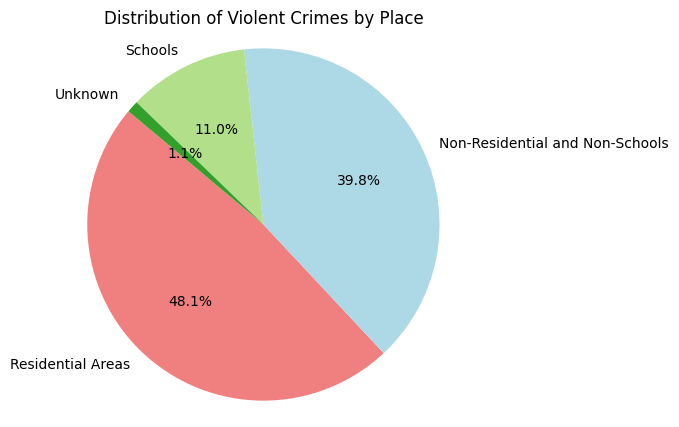

,place,amount
0,Residential Areas,8238
1,Non-Residential and Non-Schools,6817
2,Schools,1892
3,Unknown,187
4,Total,17134


In [40]:
wdih_child = chaildren_df['where_did_it_happen'].value_counts().reset_index()
wdih_child .columns = ['place', "amount"]



colors = ['lightcoral', 'lightblue'] + list(plt.cm.Paired(range(2, len(wdih_child))))
plt.figure(figsize=(5,5))
plt.pie(wdih_child['amount'], labels=wdih_child['place'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Violent Crimes by Place')
plt.axis('equal') 
plt.show()

total_amount = wdih_child['amount'].sum()
total_row = pd.DataFrame({'place': ['Total'], 'amount': [total_amount]})
wdih_child = pd.concat([wdih_child, total_row], ignore_index=True)
wdih_child

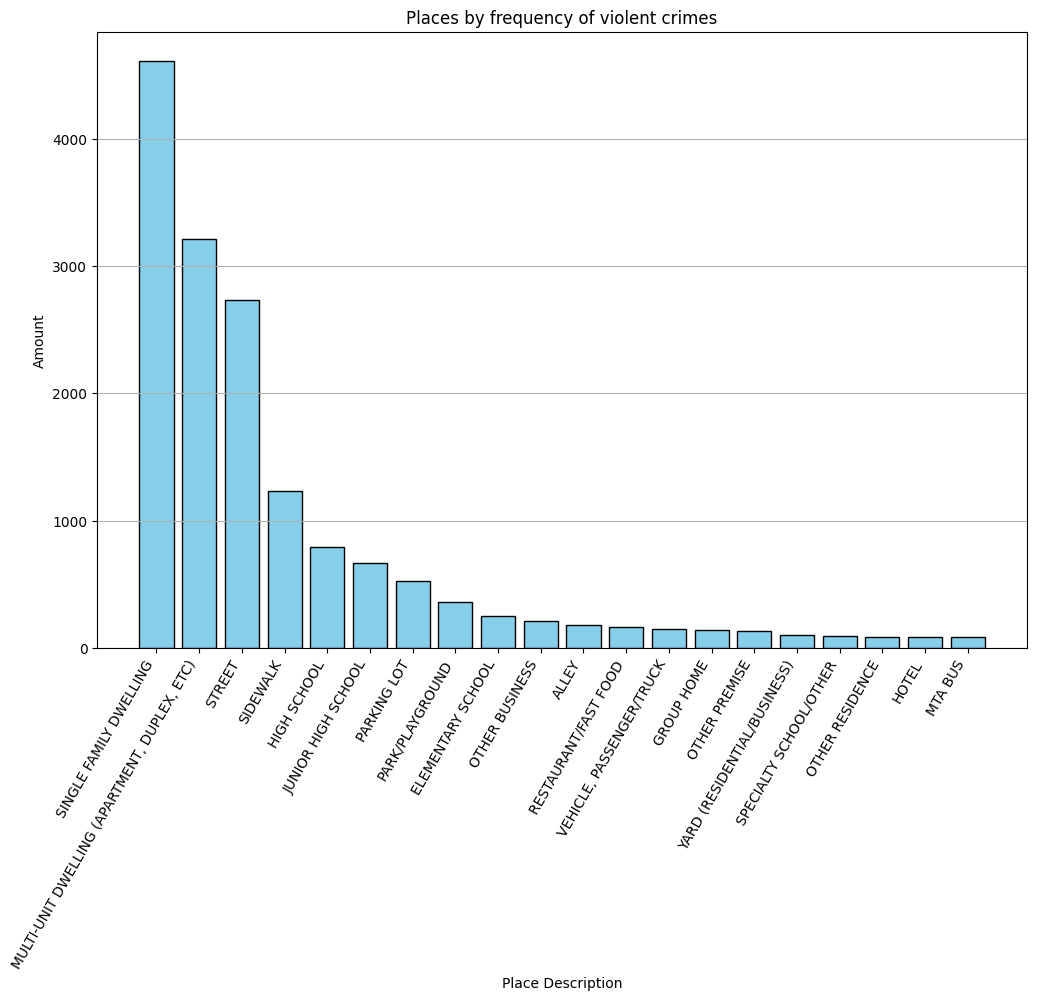

In [31]:
### מקומות נפוצים בהם קרו פשעי אלימות נגד קטינים וילדים
premise_counts_violence = chaildren_df['premise_description'].value_counts().reset_index()
premise_counts_violence.columns = ["place_description", "amount"]
premise_counts_violence.head(20)




plt.figure(figsize=(12, 8))
plt.bar(premise_counts_violence['place_description'].head(20), premise_counts_violence['amount'].head(20), color='skyblue', edgecolor='black')
plt.title('Places by frequency of violent crimes')
plt.xlabel('Place Description')
plt.ylabel('Amount')
plt.xticks(rotation=60,ha = "right")  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.show()


##### מסקנה 1 
על פי ההתבוננות בהיסטוגרמה ניתן להבחין כי בפער בין המקומות בהם בוצעו פשעי אלימות נגד ילדים ונערים כאשר שני הקומות המובילים הינם מתחמי מגורים.
נתון זה עלול להצביע על מגמה מדאיגה של מקרים רבים שלאלימות במשפחה בשל הפער הגדול בין המקרים שקראו במתחמי מגורים לבין מקרים שקראו במקומות אחרים
מתוך 17134 מקרים של אלימות נגד ילדים ונכערים מתחת לגיל 18 בין השנים 2020 ל2023 8238 מקרים קראו במתחמי מגורים מעל 7.5 מקרים ליום בממוצע

### פשעים לפי עונות השנה

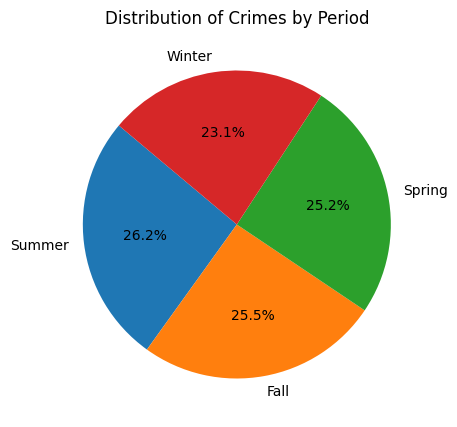

,priod,amount_crime
0,Summer,223392
1,Fall,217565
2,Spring,214844
3,Winter,197149


In [26]:
### נצייג שכאן לא נוריד שום פשע מכיוון שאנו רוצים לדעת על כלל הפשעים
priod_df = df["period_occurred"].value_counts().reset_index()
priod_df.columns = ["priod","amount_crime"]

plt.figure(figsize=(5,5))
plt.pie(priod_df['amount_crime'], labels=priod_df['priod'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Crimes by Period')
plt.show()
priod_df


### טבלת עבירות נגד כל מוצא אתני

In [38]:
most_common_crime_description = df.groupby('victim_descent')['crime_description'].agg(lambda x: x.value_counts().idxmax())
most_common_crime_description.to_frame()

,crime_description
victim_descent,
American Indian/Alaskan Native,THEFT OF IDENTITY
Asian,BURGLARY
Asian Indian,BURGLARY FROM VEHICLE
Black,BATTERY - SIMPLE ASSAULT
Cambodian,BURGLARY FROM VEHICLE
Chinese,BURGLARY FROM VEHICLE
Filipino,BURGLARY FROM VEHICLE
Guamanian,BURGLARY FROM VEHICLE
Hawaiian,ARSON


### פשעים נגד היספנים

In [62]:
violence_victim = violence_df['victim_descent'].value_counts().reset_index()
violence_victim.columns = ['victim_descen', 'amount']
violence_victim

,victim_descen,amount
0,Hispanic,126178
1,Black,58663
2,White,49097
3,Other,20815
4,Unknown,20682
5,Asian,5511
6,Korean,795
7,Filipino,508
8,Chinese,374
9,Japanese,144


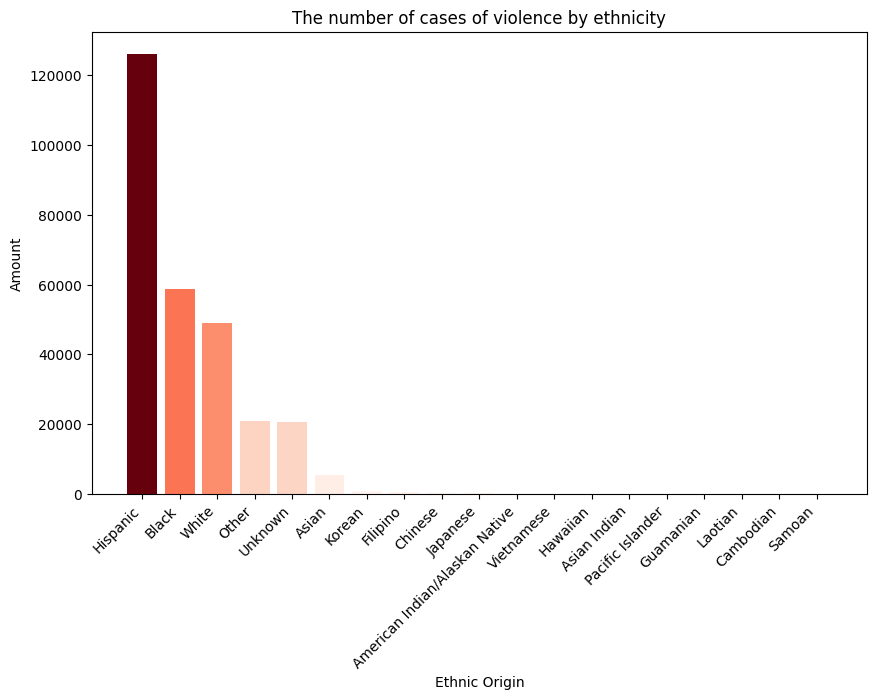

In [56]:
violence_victim = violence_df['victim_descent'].value_counts().reset_index()
violence_victim.columns = ['victim_descent', 'amount']

plt.figure(figsize=(10,6))


colors = ['red' for _ in range(len(violence_victim))]


normalized_amount = violence_victim['amount'] / float(max(violence_victim['amount']))
colors = plt.cm.Reds(normalized_amount)

plt.bar(violence_victim['victim_descent'], violence_victim['amount'], color=colors)  
plt.ylabel('Amount')
plt.xlabel('Ethnic Origin')
plt.title('The number of cases of violence by ethnicity')
plt.xticks(rotation=45,ha = "right")  
plt.show()

###### ניצן להבחין שכמות מקרי האלימות כלפי ההיספנקים גדולה ביותר מפי 2 מהלאום השני הבא אחריו
##### דבר זה יכול לרמז על אלימות כלפי ההיספנקים כפשעי אלימות על רקע לאומני נמשיך לבדוק על פשעים כלפיהם

In [65]:
victim_sex_crimes = sex_crimes['victim_descent'].value_counts().reset_index()
victim_sex_crimes.columns = ['victim_descent', 'amount']
victim_sex_crimes

,victim_descent,amount
0,Hispanic,6002
1,White,3087
2,Black,2407
3,Other,796
4,Unknown,790
5,Asian,358
6,Korean,14
7,Filipino,11
8,American Indian/Alaskan Native,9
9,Chinese,6


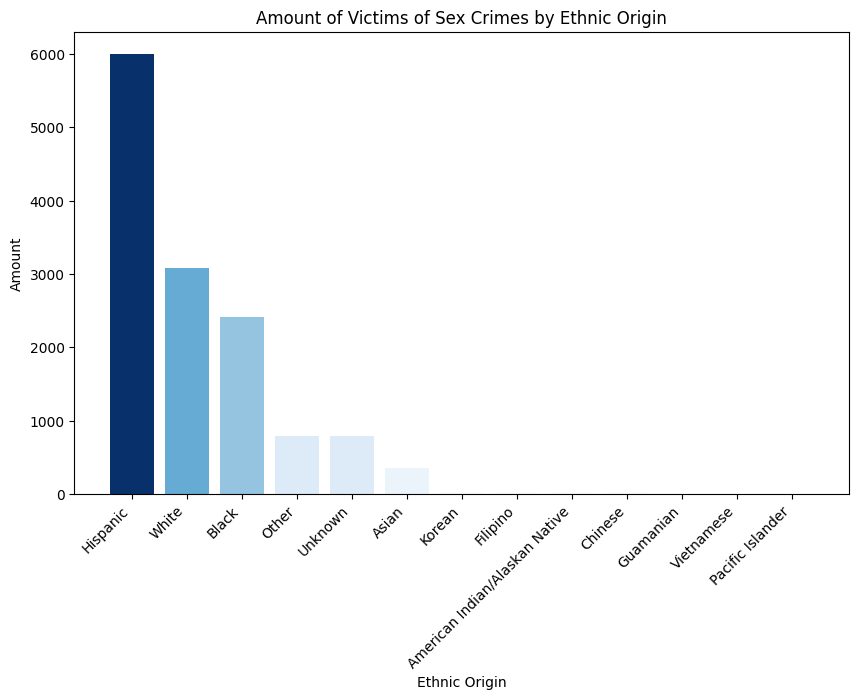

In [66]:
victim_sex_crimes = sex_crimes['victim_descent'].value_counts().reset_index()
victim_sex_crimes.columns = ['victim_descent', 'amount']

plt.figure(figsize=(10,6))

# Using only blue color for the bars
colors = ['blue' for _ in range(len(victim_sex_crimes))]

# Making the taller bars darker
normalized_amount = victim_sex_crimes['amount'] / float(max(victim_sex_crimes['amount']))
colors = plt.cm.Blues(normalized_amount)

plt.bar(victim_sex_crimes['victim_descent'], victim_sex_crimes['amount'], color=colors)  # Vertical bar plot
plt.ylabel('Amount')
plt.xlabel('Ethnic Origin')
plt.title('Amount of Victims of Sex Crimes by Ethnic Origin')
plt.xticks(rotation=45,ha = "right")  # Rotate x-axis labels for better readability
plt.show()

##### מגמת הפשיעה נגד ההספניקים נמשכת
הנתונים על פשעי אלימות ומין נגד ההיספנקים מציגים לנו נתונים מדאיגים נמשיך לחקור את הנושא

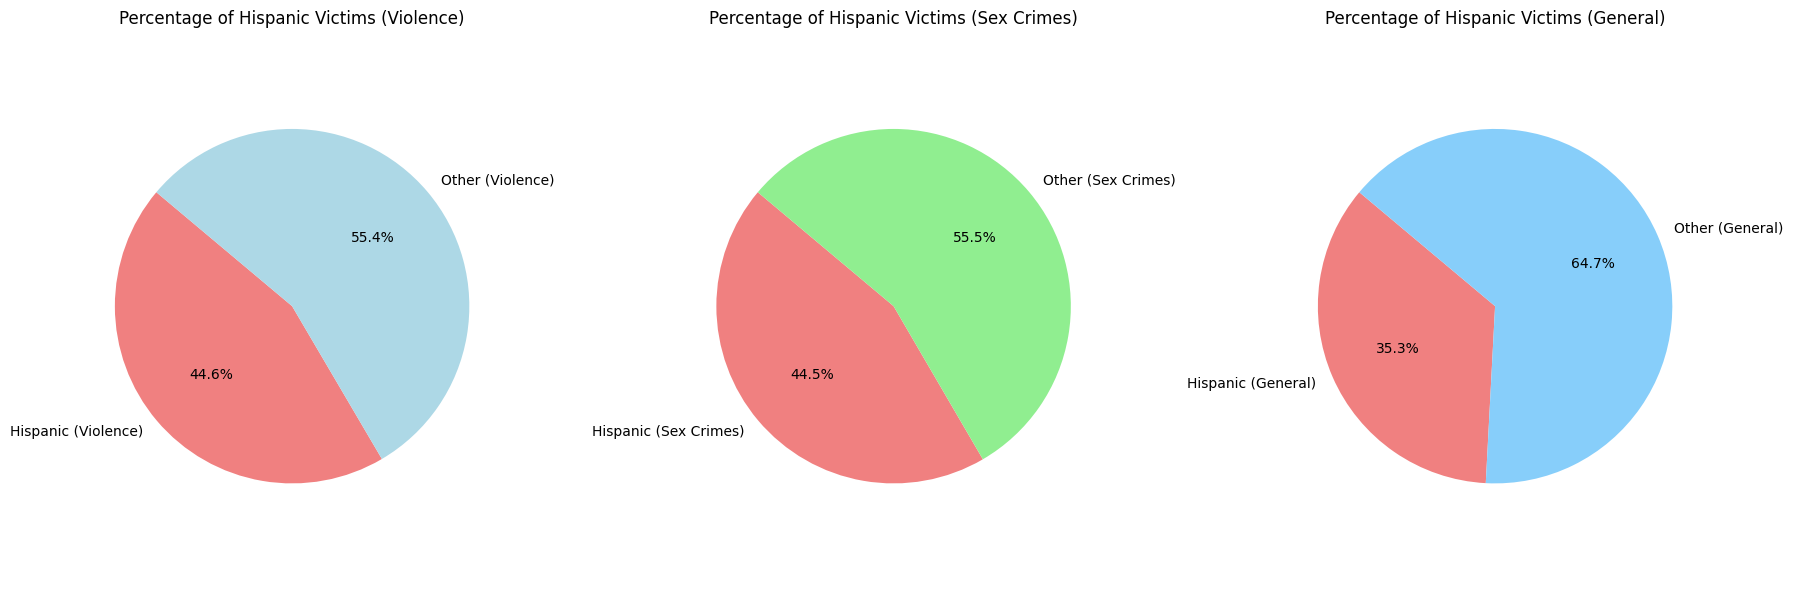

In [79]:
# For violence_df
victim_descent_data_violence = violence_df['victim_descent'].value_counts()
hispanic_count_violence = victim_descent_data_violence.get('Hispanic', 0)
other_count_violence = victim_descent_data_violence.sum() - hispanic_count_violence

# For sex_crimes
victim_descent_data_sex_crimes = sex_crimes['victim_descent'].value_counts()
hispanic_count_sex_crimes = victim_descent_data_sex_crimes.get('Hispanic', 0)
other_count_sex_crimes = victim_descent_data_sex_crimes.sum() - hispanic_count_sex_crimes

# For general victim descent data
victim_descent_data = df['victim_descent'].value_counts()
hispanic_count = victim_descent_data.get('Hispanic', 0)
other_count = victim_descent_data.sum() - hispanic_count

# Labels and sizes for violence_df
labels_violence = ['Hispanic (Violence)', 'Other (Violence)']
sizes_violence = [hispanic_count_violence, other_count_violence]
colors_violence = ['lightcoral', 'lightblue']  # Red for Hispanic, lightblue for others

# Labels and sizes for sex_crimes
labels_sex_crimes = ['Hispanic (Sex Crimes)', 'Other (Sex Crimes)']
sizes_sex_crimes = [hispanic_count_sex_crimes, other_count_sex_crimes]
colors_sex_crimes = ['lightcoral', 'lightgreen']  # Red for Hispanic, lightgreen for others

# Labels and sizes for general victim descent data
labels_general = ['Hispanic (General)', 'Other (General)']
sizes_general = [hispanic_count, other_count]
colors_general = ['lightcoral', 'lightskyblue']  # Red for Hispanic, lightgrey for others

# Plotting the combined pie charts
plt.figure(figsize=(18, 6))

# Subplot for violence_df
plt.subplot(1, 3, 1)
plt.pie(sizes_violence, labels=labels_violence, colors=colors_violence, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Hispanic Victims (Violence)')
plt.axis('equal')  # Ensure the pie chart is a circle

# Subplot for sex_crimes
plt.subplot(1, 3, 2)
plt.pie(sizes_sex_crimes, labels=labels_sex_crimes, colors=colors_sex_crimes, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Hispanic Victims (Sex Crimes)')
plt.axis('equal')  # Ensure the pie chart is a circle

# Subplot for general victim descent data
plt.subplot(1, 3, 3)
plt.pie(sizes_general, labels=labels_general, colors=colors_general, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Hispanic Victims (General)')
plt.axis('equal')  # Ensure the pie chart is a circle

plt.tight_layout()
plt.show()



In [ ]:
### הפשעים כנגד ההיספניקים מהווים כ44.6 מפשעי האלימות כ44.5 מפשעי המין וכ35.3 מתוך כלל הפשעים

In [82]:
hispanic_df = df[df["victim_descent"] =="Hispanic"]
area_counts = hispanic_df['area_name'].value_counts()
area_counts_df = pd.DataFrame(area_counts)
area_counts_df.reset_index(inplace=True)
area_counts_df.columns = ['area_name', 'amount']
area_counts_df


,area_name,amount
0,Newton,20552
1,Mission,18272
2,77th Street,17706
3,Hollenbeck,17021
4,Southeast,16079
5,Rampart,15834
6,Central,15634
7,Olympic,14061
8,Foothill,13347
9,Southwest,13238


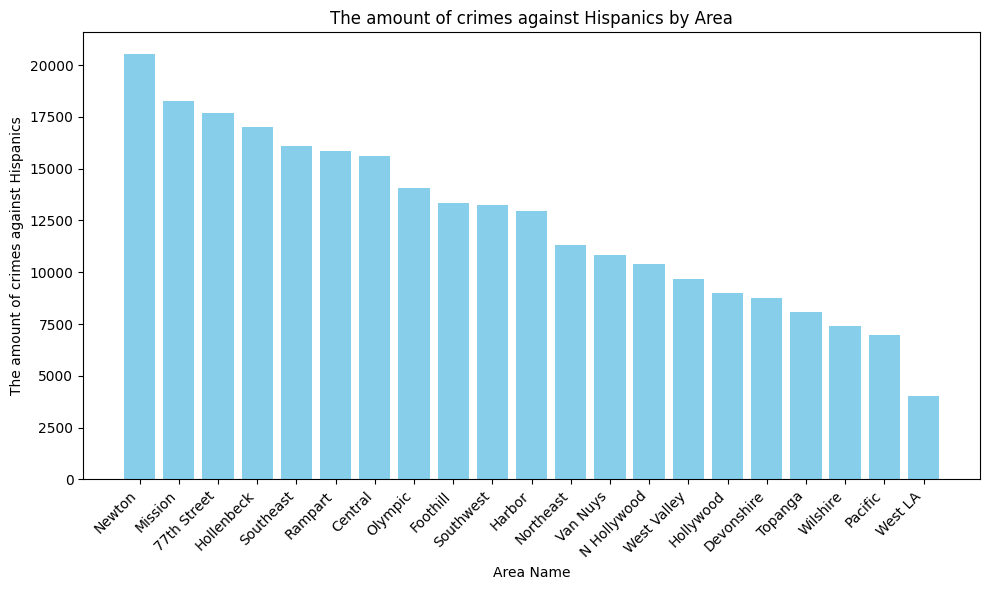

In [85]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.bar(area_counts_df['area_name'], area_counts_df['amount'], color='skyblue')
plt.xlabel('Area Name')
plt.ylabel('The amount of crimes against Hispanics')
plt.title('The amount of crimes against Hispanics by Area')
plt.xticks(rotation=45,ha="right")
plt.tight_layout()  
plt.show()

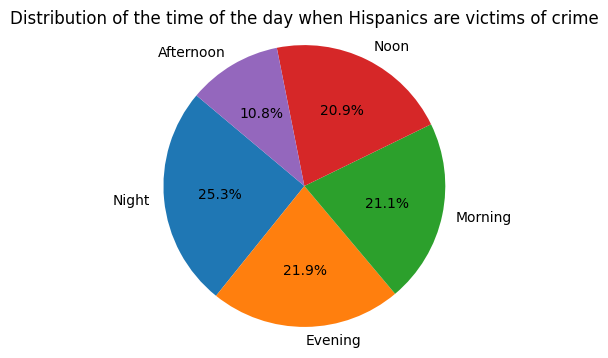

In [89]:
day_time_counts = hispanic_df['day_time'].value_counts()

# יצירת גרף עוגה
plt.figure(figsize=(4,4))
plt.pie(day_time_counts, labels=day_time_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of the time of the day when Hispanics are victims of crime')
plt.axis('equal')
plt.show()

###### מסקנה 2 
אנו ממליצים למשרת לוס אנגל'ס לתגבר כוחות במקומות בהם נמצאים נפגעים הכי הרבה היספנים כי ההיספנים מהווים יותר מ35 אחוז
מכלל הנפגעים מפשע בלוס אנג'לס בין השנים2020 ל2023 וכיותר מ44 אחוז מפשעי המין והאלימות שקראו בלוס אנגלס באותם שנים
נעשו נגד היספנים מדובר על יותר מ297,500 מקרים בשלוש שנים ועל יותר מ270 מקרי פשיעה בממוצע ליום! מספרים שלא נתפסים


### חיפוש קורלציות

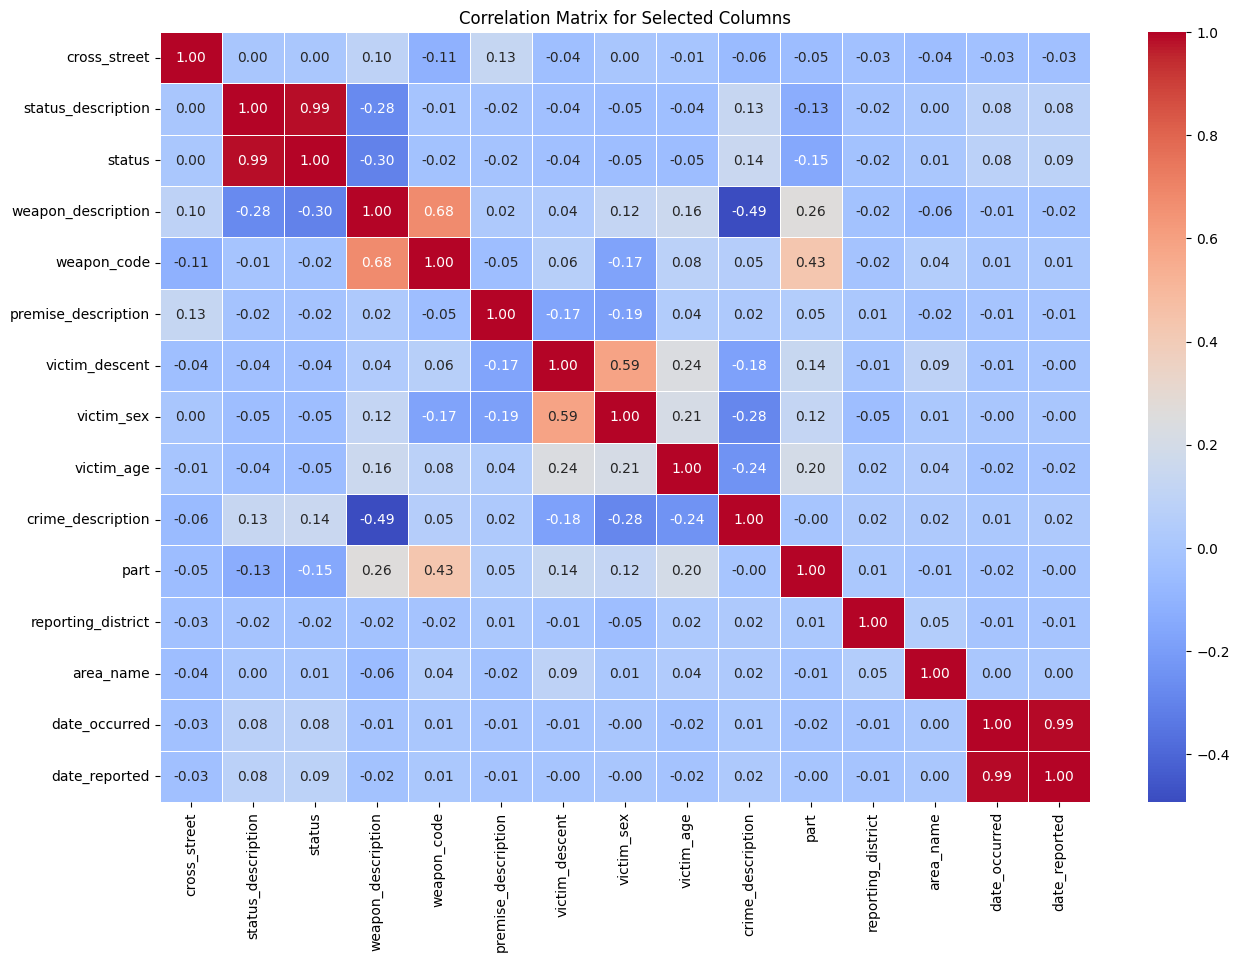

In [50]:
# Selecting specific columns for correlation analysis
selected_columns = [
    'cross_street', 'status_description', 'status', 'weapon_description',
    'weapon_code', 'premise_description', 'victim_descent', 'victim_sex',
    'victim_age', 'crime_description', 'part', 'reporting_district', 
    'area_name', 'date_occurred', 'date_reported'
]

# Create a copy of the dataframe with only the selected columns
df_selected = df[selected_columns].copy()

# Convert all non-numeric columns to categorical types and then to numerical codes for correlation analysis
non_numeric_columns_selected = df_selected.select_dtypes(exclude=['number']).columns

# Converting non-numeric columns to categorical codes
for column in non_numeric_columns_selected:
    df_selected[column] = df_selected[column].astype('category').cat.codes

# Calculate the correlation matrix for the selected columns
correlation_matrix_selected = df_selected.corr()

# Plotting the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix_selected, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Selected Columns')
plt.show()

### היסטוגרמה של התפלגות הגילאים

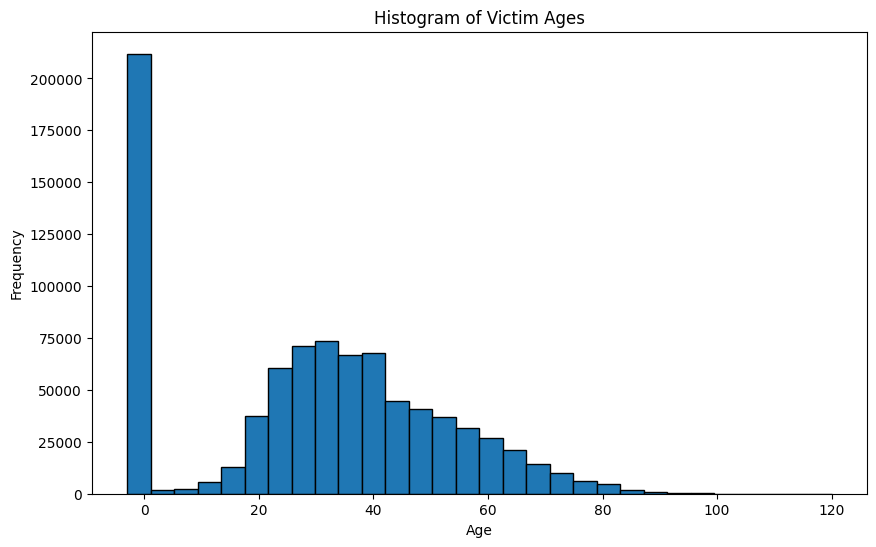

In [6]:
plt.figure(figsize=(10, 6))
df['victim_age'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Histogram of Victim Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### רעיונות

מגמות פשיעה לאורך הזמן: ניתוח איך שיעורי הפשיעה השתנו בחודשים ובשנים.
התפלגות גיאוגרפית של פשעים: זיהוי אילו אזורים או שכונות יש את שיעורי הפשיעה הגבוהים ביותר.
סוגי פשעים נפוצים: קביעת סוגי הפשעים הנפוצים ביותר המדווחים.
סטטוס פתרון פשעים: חקירת הסטטוס של הפשעים המדווחים (לדוגמה, פשעים שנפתרו, בפעולה).
דפוסי פעילות פשיעה: ניתוח דפוסים או שיטות נפוצות בפשעים.

### פשעים נגד נשים

In [13]:
women_df = df[df["victim_sex"] =="F"]
women_df
crimes_against_women = women_df['crime_description'].value_counts().reset_index()
crimes_against_women.columns = ['crime_description', 'count']
crimes_against_women

,crime_description,count
0,INTIMATE PARTNER - SIMPLE ASSAULT,32408
1,BATTERY - SIMPLE ASSAULT,31946
2,THEFT OF IDENTITY,31030
3,BURGLARY FROM VEHICLE,21881
4,THEFT PLAIN - PETTY ($950 & UNDER),18661
...,...,...
127,BRIBERY,2
128,FIREARMS RESTRAINING ORDER (FIREARMS RO),1
129,LYNCHING - ATTEMPTED,1
130,GRAND THEFT / AUTO REPAIR,1


### חקרית הנושא פערים בין תאריך דיווח לתאריך התרחשות

In [33]:
day_dift_counts = filtered_df['day_dift'].value_counts().reset_index()
day_dift_counts.columns = ['day_dift', 'frequency']


most_common_crime = filtered_df.groupby('day_dift')['crime_description'].agg(lambda x: x.mode()[0])
most_common_crime_counts = filtered_df.groupby(['day_dift', 'crime_description']).size().reset_index(name='counts')
most_common_crime_counts = most_common_crime_counts.loc[most_common_crime_counts.groupby('day_dift')['counts'].idxmax()]

result = day_dift_counts.merge(most_common_crime_counts, on='day_dift')
result = result[['day_dift', 'frequency', 'crime_description', 'counts']]


### רעיונות למסקנות

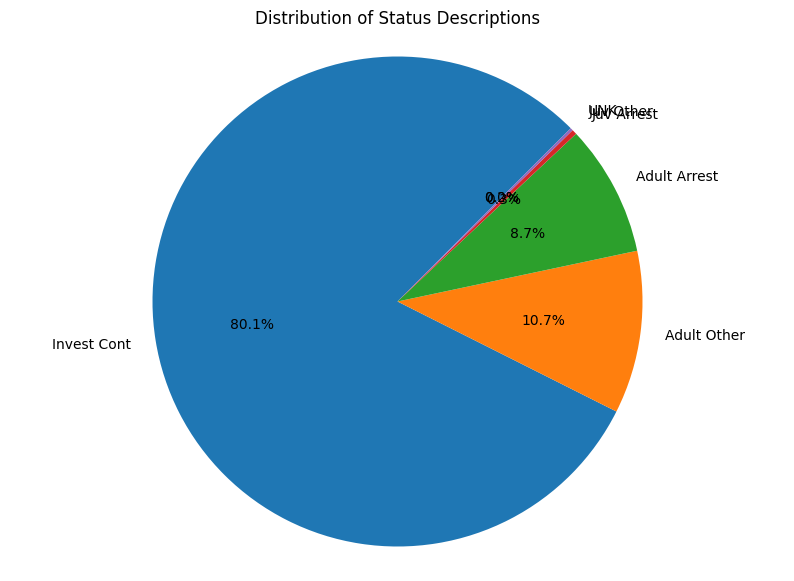

In [40]:
status_counts = df['status_description'].value_counts().reset_index()
status_counts.columns = ['status_description', 'count']

status_counts
plt.figure(figsize=(10, 7))
plt.pie(status_counts['count'], labels=status_counts['status_description'], autopct='%1.1f%%', startangle=45)
plt.title('Distribution of Status Descriptions')
plt.axis('equal')  # שומרים על היחס כדי שהעוגה תהיה עגולה
plt.show()

In [42]:
df['date_reported'] = pd.to_datetime(df['date_reported'], errors='coerce')

# מחיקת שורות שבהן לא הצלחנו להמיר את התאריך
crime_data = df.dropna(subset=['date_reported'])

# חילוץ השנה מהעמודה 'date_reported'
crime_data['year_reported'] = crime_data['date_reported'].dt.year

# קיבוץ לפי 'year_reported' ו-'status_description' וספירת הכמות בכל קבוצה
status_counts_by_year = crime_data.groupby(['year_reported', 'status_description']).size().reset_index(name='count')
status_counts_by_year 

,year_reported,status_description,count
0,2020,Adult Arrest,20239
1,2020,Adult Other,25488
2,2020,Invest Cont,145953
3,2020,Juv Arrest,734
4,2020,Juv Other,289
5,2021,Adult Arrest,19566
6,2021,Adult Other,25261
7,2021,Invest Cont,162503
8,2021,Juv Arrest,621
9,2021,Juv Other,332


In [43]:
crime_data['date_reported'] = pd.to_datetime(crime_data['date_reported'], errors='coerce')

# מחיקת שורות שבהן לא הצלחנו להמיר את התאריך
crime_data = crime_data.dropna(subset=['date_reported'])

# חילוץ השנה מהעמודה 'date_reported'
crime_data['year_reported'] = crime_data['date_reported'].dt.year

# קיבוץ לפי 'year_reported' ו-'status_description' וספירת הכמות בכל קבוצה
status_counts_by_year = crime_data.groupby(['year_reported', 'status_description']).size().unstack(fill_value=0)

# חישוב האחוזים לכל ערך של status_description בכל שנה
status_percentages_by_year = status_counts_by_year.div(status_counts_by_year.sum(axis=1), axis=0) * 100

# הצגת התוצאה
print(status_percentages_by_year)

status_description  Adult Arrest  Adult Other  Invest Cont  Juv Arrest  \
year_reported                                                            
2020                   10.502691    13.226571    75.739869    0.380897   
2021                    9.393950    12.128210    78.020290    0.298152   
2022                    8.246620    10.467273    80.799010    0.304170   
2023                    6.829938     7.479092    85.164455    0.325038   

status_description  Juv Other       UNK  
year_reported                            
2020                 0.149972  0.000000  
2021                 0.159399  0.000000  
2022                 0.182077  0.000851  
2023                 0.200555  0.000922  


In [49]:
age_description_avg_day_diff = crime_data.groupby('age_description')['day_dift'].mean().reset_index()

# שינוי שמות העמודות לברורים יותר
age_description_avg_day_diff.columns = ['age_description', 'average_day_dift']
age_description_avg_day_diff

,age_description,average_day_dift
0,adult,10.710647
1,child,7.585893
2,old,13.387976
3,teenager,34.294754
